In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("mushroom.csv", sep=';')

# Business Case Evaluation:

Let us know some facts here:

In 2022, sales of fresh and processed mushrooms amounted to approximately 694.47 million Canadian dollars, an increase from around 653.51 million the previous year. you can find more info here-(https://www.statista.com/statistics/454864/sales-value-of-fresh-and-processed-mushrooms-in-canada/#:~:text=This%20statistic%20shows%20the%20sales,653.51%20million%20the%20previous%20year.)

In most of the countries, classification of mushrooms occur based on the visible characteristics like size, color and shape. this is not a reliable way to classify mushrooms.

According to all available evidence, eating foraged mushrooms has resulted in at least a single death, at least three serious poisonings, and perhaps as many as ten poisonings in Ontario over the last few years.

The scientific process of classifying a mushroom is a time taking and an expensive process.


Hence, building a good model that can reliably predict the safety of eating a mushroom is a solution for all the above mentioned problems. if this model is deployed with an application which users can interact with, knowing the nature of mushroom whether edible or not is just few taps away!

# Data Identification

This Dataset has been acquired from a reputed website called UC Irvine Machine Learning Repository. This is hub to many other dataset used for various machine learning use cases.

## Link for the Dataset:
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

### Features Description:

Class information:
1. class		poisonous=p, edibile=e (binary)

Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h, leathery=l, silky=k,sticky=t,wrinkled=w,fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

# Understanding the Data: Exploratory Data Analysis

In [ ]:
df.shape

(61069, 21)

In [ ]:
#to display all the columns
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,5.45,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
#only 3 numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# Data Validation and Cleansing

In [ ]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
#percentage of null values in each column
missing_percent = df.isnull().sum()*100/len(df)
missing_values = pd.DataFrame({"missing_percent": missing_percent})
missing_values.sort_values(by="missing_percent", ascending=False)

,missing_percent
veil-type,94.797688
spore-print-color,89.595376
veil-color,87.861272
stem-root,84.393064
stem-surface,62.427746
gill-spacing,41.040462
cap-surface,23.121387
gill-attachment,16.184971
ring-type,4.046243
class,0.000000


In [ ]:
#replacing special characters with NA
df.replace(['?','nan'],pd.NA,inplace=True)

In [ ]:
#imputing nan values with mode
for columns in df.columns:
    most_common_value=df[columns].mode()[0] #to use the first most occuring value, as there can be a tie between value occurance
    df[columns].fillna(most_common_value,inplace=True)

In [ ]:
#checking if the fillna worked.
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

<Axes: xlabel='stem-width', ylabel='stem-height'>

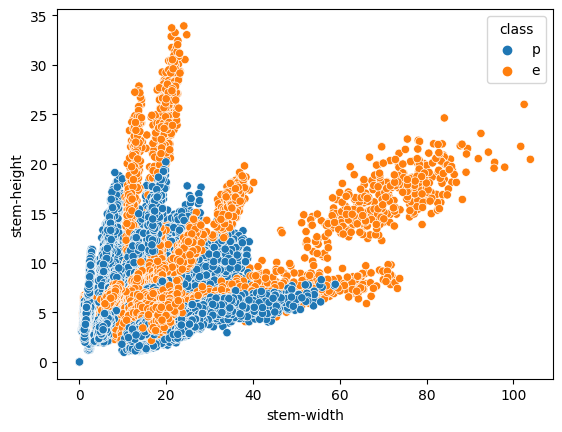

In [ ]:
sns.scatterplot(data=df,y='stem-height',x='stem-width',hue='class')

<Axes: xlabel='class', ylabel='count'>

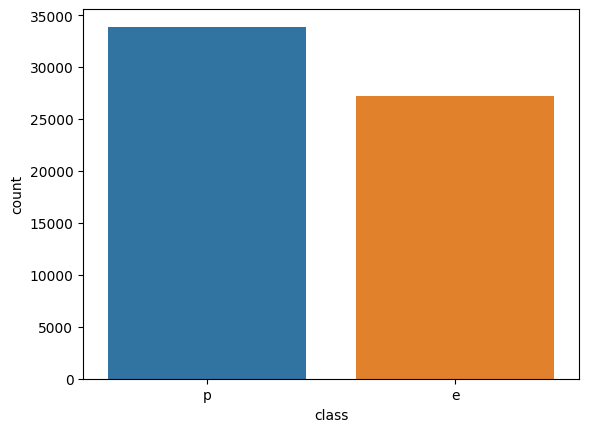

In [ ]:
#checking target label bias
sns.countplot(x='class', data=df)

the imbalance is not impactful, can proceed

In [ ]:
def plot_count(x,ax):
    group = df.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')
cols = df.columns.tolist()
fig, axes = plt.subplots(10, 2, figsize=(18, 6 * 11))

for index,column in enumerate(cols[1:]):
    row = index // 2
    col = index % 2
    ax = axes[row,col]
    plot_count(column, ax)

plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


NameError: ignored

In [ ]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [ ]:
#dividing the features in numerical and categorical types
Target='class'
features=[col for col in df.columns if col not in [Target]]
numeric_features=['cap-diameter','stem-height','stem-width']
categorical_features=[col for col in features if col not in numeric_features]
print('the target variable is:',Target)
print('='*90)
print('numeric_features',numeric_features)
print('lenght:',len(numeric_features))
print('='*90)
print('categorical_features:',categorical_features)
print('lenght:',len(categorical_features))

the target variable is: class
numeric_features ['cap-diameter', 'stem-height', 'stem-width']
lenght: 3
categorical_features: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
lenght: 17


# Pre-processing Steps: Using Pipeline

In [ ]:
#implementing pre-processing using pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

#converting the colums to lists:
numerical_list=list(numeric_features)
cateorical_list=list(categorical_features)

#pipeline for categorical features
pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(drop='first')),
])
#pipeline for numerical features
pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

#combined pipeline using column transformer
pipeline_full = ColumnTransformer([
    ("numerical", pipeline_numerical, numerical_list),
    ("categorical", pipeline_categorical, cateorical_list),
])

now, we divide the data into 2 segments, df and df1. df1 is used to for k means clustering,

In [ ]:
df.shape

(61069, 21)

# Semi-Supervised Learning:

Semi-supervised approach, where characteristics of both supervised and unsupervised learning approaches are inhibited.This is a different approach to train the model, in this case a classifier. first with smaller portion of labelled data and then a larger portion of unlabelled data. This approach pre-trains the model to understand the inherent data properly.

In our project, We used the last 20,000 records of our primary data set to fit into K-Means Clustering. For this we divided the data into labelled and unlabelled, trained the model on a small set and made predictions for a larger set, we then replaced these 20,000 records with 'Pseudo-labels' and used the now integrated data set for our other models.

Goal of using this approach is to uncover intricate relationship between the features with the target feature and pre-train the model for it, to have better results with the larger original dataset.


In [ ]:
#using the last 20k records
df1=df.loc[41069:61069]

In [ ]:
#shape of the segmented data
df1.shape

(20000, 21)

In [ ]:
#x wil have labelled data which will be used to train the model
#y will have unlabelled data which will be used to test the model
#in semi supervised approach, training data is in smaller quantity compared to testing data
X=df1[features]
y=df1[Target]
print('the feature set shape is:',X.shape)
print('the Target set shape is:',y.shape)

the feature set shape is: (20000, 20)
the Target set shape is: (20000,)


# Creating Labelled and Unlabelled Data

Here:
        Xk_train and yk_train are labelled data and Xk_test is unlabelled Data

In [ ]:
#now we split the feature and the target set in 20:80 ratio using train test split
#we dont need a y test to compare the pred vs actual in this case, as the whole purpose is to just train the model
#and gather pseudo labels to be merged into the main dataset.
from sklearn.model_selection import train_test_split
Xk_train, Xk_test, yk_train,_ = train_test_split(X, y, test_size=0.8, stratify=y) #stratified sampling based on the target
print(f"Xk_train.shape: {Xk_train.shape}")
print(f"Xk_test.shape: {Xk_test.shape}")
print(f"yk_train.shape: {yk_train.shape}")

Xk_train.shape: (4000, 20)
Xk_test.shape: (16000, 20)
yk_train.shape: (4000,)


In [ ]:
#pre-processing using pipelines.
pipeline_full.fit(Xk_train)
Xk_train_transformed=pipeline_full.fit_transform(Xk_train)
Xk_test_transformed=pipeline_full.fit_transform(Xk_test)
print(Xk_train_transformed.shape)
print(Xk_test_transformed.shape)

(4000, 87)
(16000, 87)


# Algorithm Choice for Clustering: K-Means Clustering

In [ ]:
#now we train a kmeans clustering model on the training data and predict the testing data withit
#we dont need to use any other method to determine the number of clusters to be formed since we already know the classes
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(Xk_train_transformed,yk_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
pred_labels=kmeans.fit_predict(Xk_test_transformed)

In [ ]:
print(pred_labels)

[1 0 0 ... 0 1 1]


In [ ]:
#assigning actual class names.
mapping={0:'e',1:'p'}
pred_labels=[mapping[num] for num in pred_labels]

In [ ]:
print(pred_labels)

['p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p',

# Data Aggregation and Representation

In [ ]:
#merging the data with main dataset df1:
df_temp = pd.DataFrame({'class': pred_labels}, index=Xk_test.index)
df_20=pd.merge(Xk_test, df_temp, left_index=True, right_index=True, how='right')
#arranging the 'class' variable in the right order
df_20=df_20.set_index('class', append=True).reset_index(level=-1)

In [ ]:
df_20

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
55343,p,5.18,s,l,n,f,f,f,f,6.96,34.69,b,s,n,u,w,f,f,g,l,u
48693,e,19.38,p,w,n,f,p,c,y,18.14,72.64,b,s,n,u,w,f,f,k,d,u
51744,e,17.43,x,d,o,f,p,c,n,19.79,38.03,s,y,w,u,w,f,f,k,d,u
43415,p,8.59,x,y,w,t,a,c,w,8.24,13.69,s,s,w,u,w,t,l,k,d,u
47214,p,1.31,x,t,n,f,a,c,n,4.83,2.30,b,s,n,u,w,f,f,k,g,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45081,p,3.58,b,y,n,f,a,c,u,5.72,4.33,s,s,w,u,w,f,f,k,d,a
46947,p,3.93,x,h,n,f,a,c,n,6.22,7.27,b,s,w,u,w,f,f,k,d,u
42805,e,9.66,p,s,n,t,e,c,n,10.17,17.80,s,s,w,u,w,t,r,k,m,a
55496,p,12.36,f,t,g,f,d,c,y,2.45,13.84,b,s,w,u,w,f,f,k,d,w


In [ ]:
#merging the data with main dataset df1:
df_temp = pd.DataFrame({'class': pred_labels}, index=Xk_test.index)
df_20=pd.merge(Xk_test, df_temp, left_index=True, right_index=True, how='right')
#arranging the 'class' variable in the right order
df_20=df_20.set_index('class', append=True).reset_index(level=-1)

#merging Xk_train and yk_train:
merged_df=pd.concat([Xk_train, yk_train], axis=1)
#arranging class under the right column
merged_df=merged_df.set_index('class', append=True).reset_index(level=-1)
#merging df_20 amd merged_df
final_df=pd.concat([df_20,merged_df])

In [ ]:
#removing the last 20k records with actual lables and replacing it with pseudo lables
df=df.iloc[:-20000]

In [ ]:
#merging the pseudo lable dataset to main dataset
df=pd.concat([df,final_df])
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,s,y,w,u,w,t,g,k,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,s,y,w,u,w,t,g,k,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,s,y,w,u,w,t,g,k,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,s,y,w,u,w,t,p,k,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,s,y,w,u,w,t,p,k,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46013,e,1.54,f,w,g,f,a,d,k,5.30,2.49,b,s,w,u,w,f,f,k,d,a
55558,e,10.28,f,t,l,f,d,c,y,2.55,12.79,b,s,w,u,w,f,f,k,d,a
47931,p,4.01,b,t,n,f,a,c,n,6.80,5.52,b,s,w,u,w,t,f,k,g,u
51540,e,16.50,p,d,o,f,p,c,n,14.23,32.60,s,y,w,u,w,f,f,k,d,a


In [ ]:
#confirming the shape of df
df.shape

(61069, 21)

now, we can work on model building

# Data Analysis

# Splitting Data into Test and Train

In [ ]:
#splitting of data for target and predictor features
X=df[features]
y=df[Target]
print('the feature set shape is:',X.shape)
print('the Target set shape is:',y.shape)

the feature set shape is: (61069, 20)
the Target set shape is: (61069,)


In [ ]:
#using train_test_split to split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#using pipelines to pre-process data
pipeline_full.fit(X_train)
pipeline_full.fit(X_test)
X_train=pipeline_full.fit_transform(X_train)
X_test=pipeline_full.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(48855, 102)
(12214, 102)


In [ ]:
# Function to plot confusion matrix for each model

def plot_conf_matrix(model: list, conf_matrix: list):
  for i in range(0, len(model)):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix {model[i]}')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.show()

In [ ]:
# Function to plot bar-graphs for metrics against models

def model_vs_metric(model_list: list, metric_list: list, metric_name: str):
  plt.figure(figsize=(10, 6))
  sns.barplot(x=model_list, y=metric_list, palette='viridis')
  plt.xlabel('Models')
  plt.ylabel(metric_name)
  plt.title(f'{metric_name} of Different Models')

  plt.show()

In [ ]:
# Listing all models and metrics

model_list = []
accuracy_list = []
roc_curve_list = []
conf_matrix_list = []

# Model-1: KNearestNeighbours:

In [ ]:
# Importing KNN Classifier and metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [ ]:
knn_classifier=KNeighborsClassifier()

In [ ]:
# # Fitting the model on the training data
# knn_classifier.fit(X_train, y_train)

# # Predicting classes for test data
# y_pred = knn_classifier.predict(X_test)

# # Getting ROC, Accuracy and Confusion matrix for KNN
# y_probas_trees = cross_val_predict(knn_classifier,X_train,y_train, cv=4, method="predict_proba")
# y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
# roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
# test_accuracy = accuracy_score(y_test, y_pred)

# # Accuracy for KNN
# print(f"Test Set Accuracy for model {knn_classifier} is {test_accuracy:.2f}")

In [ ]:
# # Adding metrics to list

# model_list.append('KNN')
# accuracy_list.append(test_accuracy)
# roc_curve_list.append(roc_auc_trees)
# conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_list.append(conf_matrix)

# Model-2: Random Forest:



In [ ]:
# Importing Random Forest

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # Fitting the model on the training data
# rf_classifier = RandomForestClassifier(random_state = 42)
# rf_classifier.fit(X_train, y_train)

# # Predicting classes for test data
# y_pred = rf_classifier.predict(X_test)

# # Getting ROC, Accuracy and Confusion matrix for Random Forest
# y_probas_trees = cross_val_predict(rf_classifier,X_train,y_train, cv=4, method="predict_proba")
# y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
# roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
# test_accuracy = accuracy_score(y_test, y_pred)

# # Accuracy for Random forest
# print(f"Test Set Accuracy for model {rf_classifier} is {test_accuracy:.2f}")

In [ ]:
# # Adding metrics to list

# model_list.append('Random Forest')
# accuracy_list.append(test_accuracy)
# roc_curve_list.append(roc_auc_trees)
# conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_list.append(conf_matrix)

# Model-3: Decision Tree

In [ ]:
# Importing Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Fitting the model on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting classes for test data
y_pred = clf.predict(X_test)

# Getting ROC, Accuracy and Confusion matrix for Decision Tree
y_probas_trees = cross_val_predict(clf,X_train,y_train, cv=4, method="predict_proba")
y_tree_scores = y_probas_trees[:,1] # score = proba of positive class
print(type(y_tree_scores))
print(y_tree_scores)
# roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
# test_accuracy = accuracy_score(y_test, y_pred)

# # Accuracy for Decision Tree
# print(f"Test Set Accuracy for model {clf} is {test_accuracy:.2f}")

<class 'numpy.ndarray'>
[1. 0. 0. ... 1. 1. 1.]


In [ ]:
a=[[2,3,4],[34,42,3]]
a[:,1]

TypeError: ignored

In [ ]:
# # Adding metrics to list

# model_list.append('Decision Tree')
# accuracy_list.append(test_accuracy)
# roc_curve_list.append(roc_auc_trees)
# conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_list.append(conf_matrix)

# Model-4: Logistic Regression

In [ ]:
# Importing Logistics Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
# Fitting the model on the training data
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)

# Predicting classes for test data
y_pred = logreg_model.predict(X_test)

# Getting ROC, Accuracy and Confusion matrix for Logistic Regression
y_probas_trees = cross_val_predict(logreg_model,X_train,y_train, cv=4, method="predict_proba")
y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
accuracy = accuracy_score(y_test, y_pred)

# Accuracy for Logistics Regression
print(f"Test Set Accuracy for model {logreg_model} is {test_accuracy:.2f}")

Test Set Accuracy for model LogisticRegression(max_iter=10000) is 0.95


In [ ]:
# Adding metrics to list

model_list.append('Logistic Regression')
accuracy_list.append(test_accuracy)
roc_curve_list.append(roc_auc_trees)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_list.append(conf_matrix)

# Data Visualisation

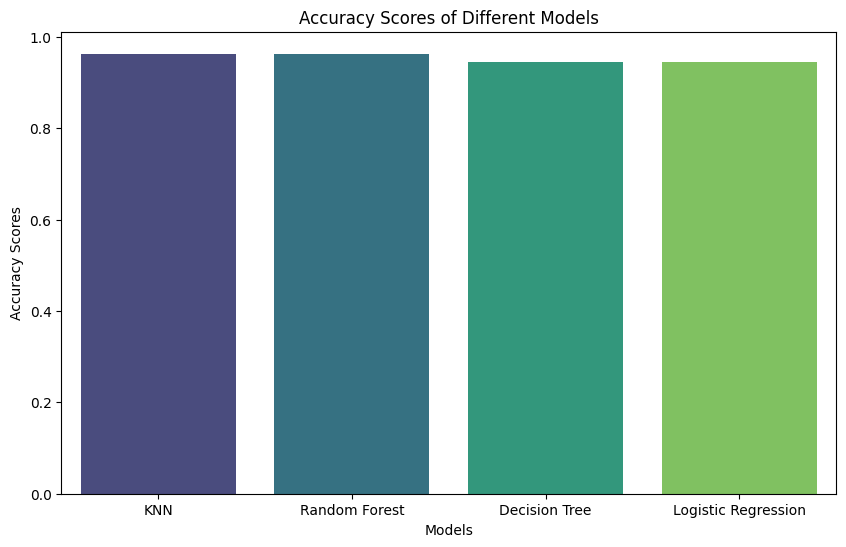

In [ ]:
# Plottint Accuracy of each model
model_vs_metric(model_list, accuracy_list, 'Accuracy Scores')

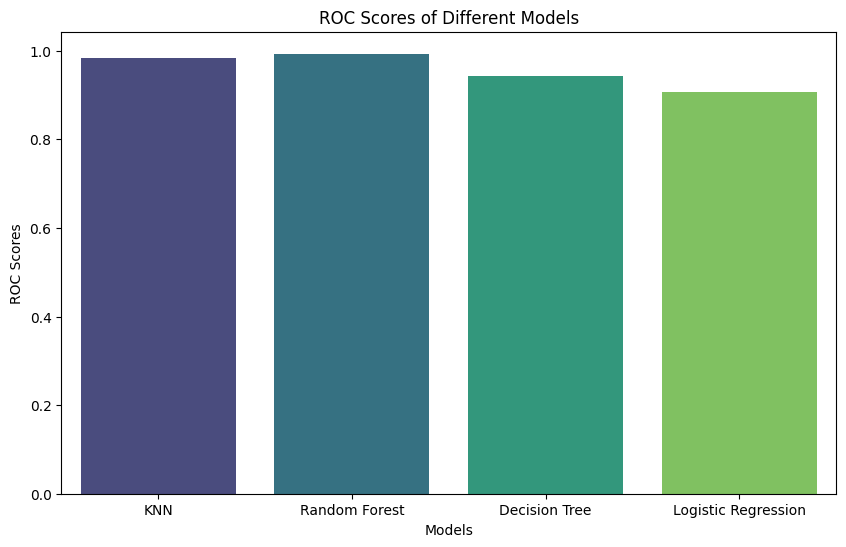

In [ ]:
# Plottint ROC of each model
model_vs_metric(model_list, roc_curve_list, 'ROC Scores')

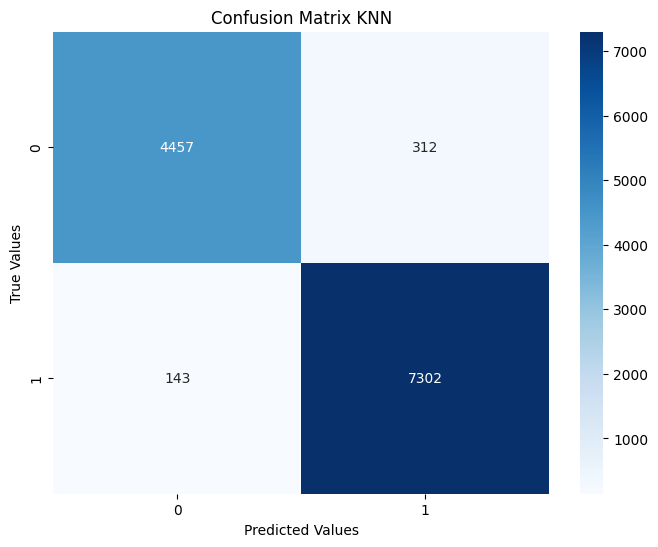

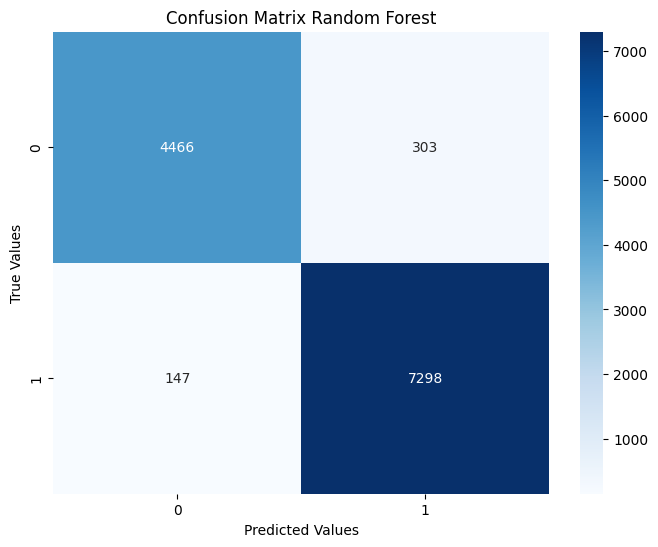

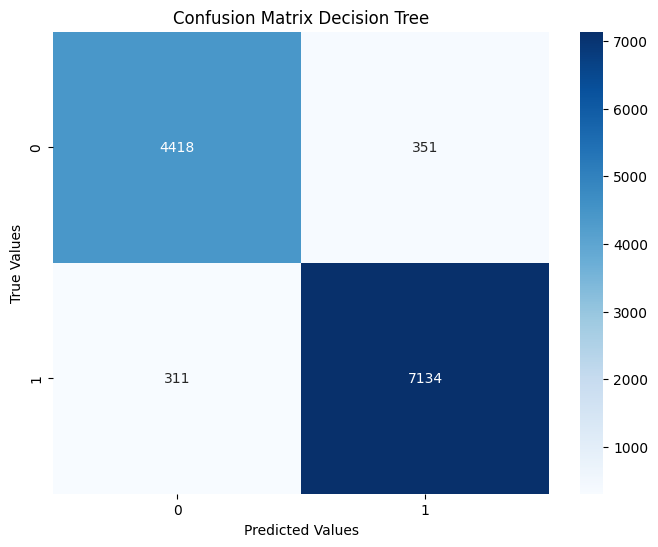

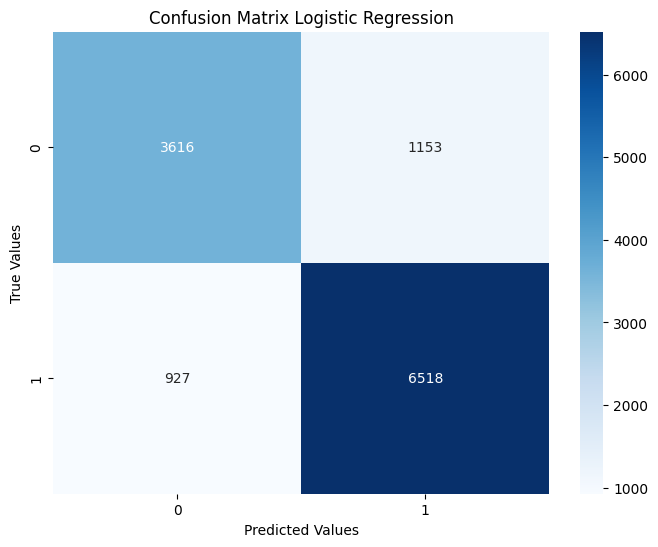

In [ ]:
# Plotting confusion matrix for each mode

plot_conf_matrix(model_list, conf_matrix_list)

# Utilization of Analysis Results

How can you use our model?

**Data-Driven Decision-Making:**

instead of randomly guessing a mushroom to be edible or not, you can take a data backed decision.
The model generates valuable insights into the factors influencing the classification of mushrooms. These insights can be leveraged for data-driven decision-making, such as optimizing cultivation practices or adjusting product portfolios.

**Market Expansion and Consumer Education:**

A reliable classification model can facilitate market expansion by assuring consumers of the safety of the products. It also provides an opportunity for businesses to educate consumers about the importance of choosing safe mushrooms.

**Market Differentiation:**

A business that can guarantee the safety of its mushroom products through an advanced classification system may gain a competitive edge in the market. It can be positioned as a brand that prioritizes consumer well-being.

**Crisis Management:**

In the event of a contamination or poisoning incident, having a classification model can enable businesses to quickly identify affected batches, initiate recalls, and communicate with consumers, mitigating the impact on both public safety and the brand.